# Salary Predictions Based on Years of Experience

## Importing Libraries

In [1]:
import numpy as np # (Numerical Python) For linear algebra and mathematical computations

import pandas as pd # (Python and data analysis) For data processing and manipulation, CSV file I/O

import matplotlib.pyplot as plt # For visualization the data

import seaborn as sns # For statistical graphics plotting with beautiful styles and color

## Importing the dataset

In [2]:
df=pd.read_csv('E:\Others\ML\Salary Predictor/Salary.csv')

In [3]:
x=df.loc[:, "YearsExperience"].values
y=df.loc[:, "Salary"].values

## Checking if there is any null value present in the dataset

In [4]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

## Defining values for implementing linear regression

In [5]:
m=len(x)
X=np.column_stack((np.ones(m), x))
Y=np.row_stack((y))
theta=np.zeros((2,1))
iterations=1500
alpha=0.03

## Function to calculate cost function, $J(\theta)$ 
Cost function computes the cost using theta as the parameter for linear regression to fit the data points in X and y so as to check the convergence of the gradient descent implementation.

In [6]:
def compute_cost(X, y, theta):
    m=len(y)
    J=0
    hx=np.dot(X, theta)
    J=(1/(2*m))*np.sum(np.square(hx-y))
    return J

## Function to implement gradient descent
Performs gradient descent to learn `theta`. Updates theta by taking `iterations` gradient steps with learning rate `alpha`.

In [7]:
def gradient_descent(X, y, theta, alpha, iterations):
    m=len(y)
    J_history=np.zeros((iterations, 1))

    for iter in range(iterations):
        theta = theta - alpha*(1/m)*X.T.dot(X.dot(theta) - np.transpose([y]))
        J_history[iter]=(compute_cost(X, y, theta))

    return theta, J_history

## Calling the `gradient_descent` function and printing the computed `theta`

In [8]:
theta, J_history = gradient_descent(X, y, theta, alpha, iterations)
theta

array([[28858.95705459],
       [ 8732.00972517]])

## Visualising the prediction
Creating a scatter plot between Salary and Experinece (in years). Also plotting the linear regression model on same plot. 

Text(0, 0.5, 'Salary')

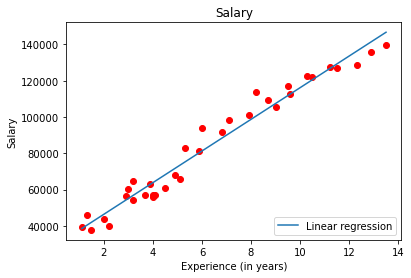

In [9]:
plt.scatter(x, y, color='red')
plt.plot(X[:, 1], X.dot(theta), '-', label='Linear regression')
plt.legend(loc='lower right')
plt.title('Salary')
plt.xlabel('Experience (in years)')
plt.ylabel('Salary')

## Plotting cost function vs iterations
This shows how the cost function decreases after every iteration.

Text(0, 0.5, 'Cost Function')

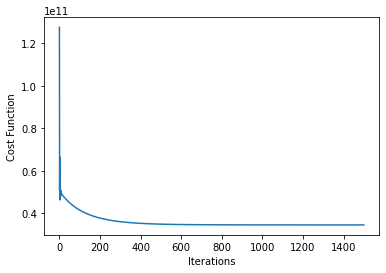

In [10]:
plt.plot(range(0,iterations), J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost Function')

## Comparing the actual salary and predicted salary

In [11]:
compare = pd.DataFrame(x, columns=["Experience (in years)"])
compare["Actual Salary"] = np.transpose([y])
compare["Predicted Salary"] = np.round(X.dot(theta))
# compare["Difference"] = np.transpose([y])-np.round(X.dot(theta))
compare

,Experience (in years),Actual Salary,Predicted Salary
0,1.1,39343,38464.0
1,1.3,46205,40211.0
2,1.5,37731,41957.0
3,2.0,43525,46323.0
4,2.2,39891,48069.0
5,2.9,56642,54182.0
6,3.0,60150,55055.0
7,3.2,54445,56801.0
8,3.2,64445,56801.0
9,3.7,57189,61167.0


## Plotting the error in prediction


Text(0.5, 1.0, 'Error in prediction')

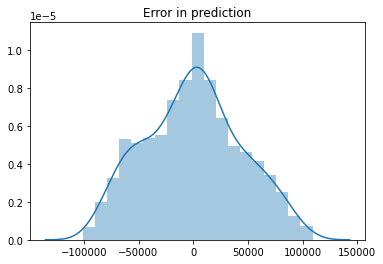

In [12]:
# plt.scatter(X[:, 1], (X.dot(theta)-Y))
sns.distplot(X.dot(theta)-y).set_title('Error in prediction')

### Test

In [13]:
print(np.array([1, 11.2]).dot(theta))

[126657.4659765]
